In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data["Embarked"].value_counts() # S is more frequent

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
# implace age with mean value 
data["Age"].fillna(data["Age"].mean(), inplace=True)
# implace embarked with the most frequent value 
data["Embarked"].fillna("S", inplace=True)
# deleate cabin column as it contains too much missing values
data.drop("Cabin", axis = 1,inplace = True)

In [6]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
print(data["Pclass"].value_counts()) #cathegorical
print(data["SibSp"].value_counts()) #cathegorical
print(data["Parch"].value_counts()) #cathegorical

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [8]:
data.drop("Name", axis = 1,inplace = True)

In [9]:
# map the two genders to 0 and 1
data.Sex = data.Sex.map({'male':0, 'female':1})

In [10]:
data['Alone'] = data.SibSp + data.Parch
data.Alone = data.Alone.apply(lambda x: 1 if x == 0 else 0)

In [11]:
# drop SibSp and Parch column
data.drop(['SibSp','Parch'], axis = 1, inplace = True)

In [12]:
data.Ticket.head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [13]:
data.Ticket = data.Ticket.map(lambda x: x[0])

In [14]:
data['Ticket'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64

In [15]:
data['Ticket'] = data['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

In [16]:
data['Fare-bined'] = pd.qcut(data.Fare,5,labels=[1,2,3,4,5]).astype(int)

In [17]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary
age_index = (1,2,3,4,5,6,7) #('baby','child','teenager','young','mid-age','over-50','senior')
data['Age-bined'] = pd.cut(data.Age, bins, labels=age_index).astype(int)


In [19]:
data

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Alone,Fare-bined,Age-bined
0,1,0,3,0,22.000000,4,7.2500,S,0,1,4
1,2,1,1,1,38.000000,P,71.2833,C,0,5,5
2,3,1,3,1,26.000000,S,7.9250,S,1,2,4
3,4,1,1,1,35.000000,1,53.1000,S,0,5,5
4,5,0,3,0,35.000000,3,8.0500,S,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,2,13.0000,S,1,3,4
887,888,1,1,1,19.000000,1,30.0000,S,1,4,4
888,889,0,3,1,29.699118,4,23.4500,S,0,4,4
889,890,1,1,0,26.000000,1,30.0000,C,1,4,4


In [20]:
data.drop(['Age','Fare','PassengerId'], axis = 1, inplace = True)

In [21]:
titanic = pd.get_dummies(data, columns=['Pclass','Embarked','Ticket','Fare-bined','Age-bined'])
titanic

,Survived,Sex,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Ticket_1,...,Fare-bined_3,Fare-bined_4,Fare-bined_5,Age-bined_1,Age-bined_2,Age-bined_3,Age-bined_4,Age-bined_5,Age-bined_6,Age-bined_7
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
887,1,1,1,1,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
888,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
889,1,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [22]:
titanic

,Survived,Sex,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Ticket_1,...,Fare-bined_3,Fare-bined_4,Fare-bined_5,Age-bined_1,Age-bined_2,Age-bined_3,Age-bined_4,Age-bined_5,Age-bined_6,Age-bined_7
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
887,1,1,1,1,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
888,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
889,1,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [23]:
X=titanic.drop(['Sex'], axis=1)
y=titanic['Sex']

C:\Users\ilona\Documents\sample_projects_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

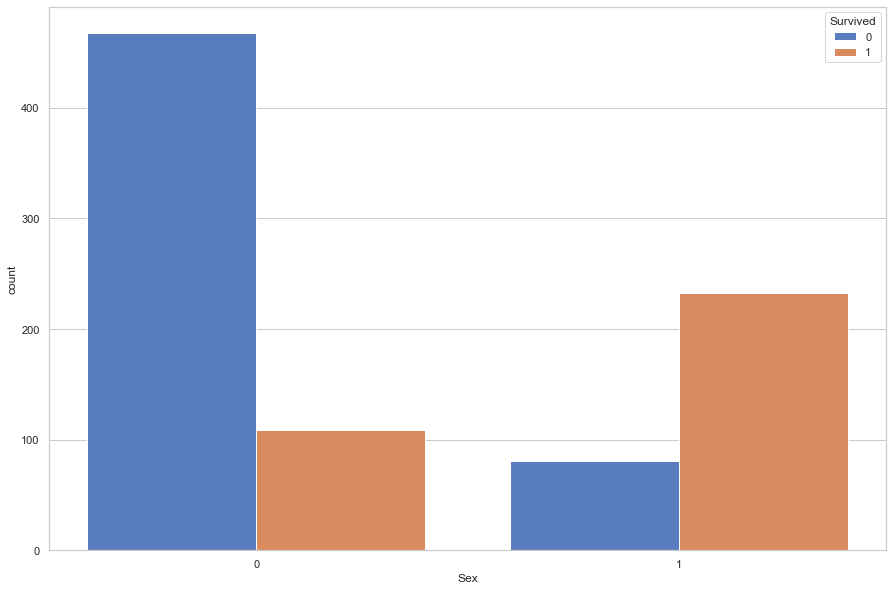

In [24]:
import seaborn as sns 
#visualizing whether survived affect the sex rate or not
sns.countplot('Sex', hue = 'Survived', data = data)
plt.plot()

C:\Users\ilona\Documents\sample_projects_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


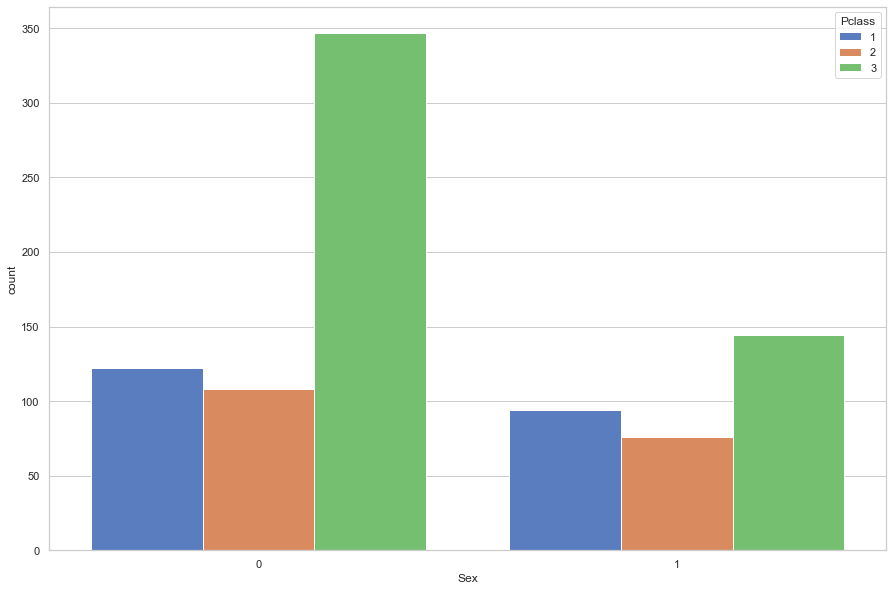

In [25]:
# visualizing whether pclass affect the sex rate or not
sns.countplot("Sex", hue = 'Pclass', data = data)
plt.show()

C:\Users\ilona\Documents\sample_projects_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


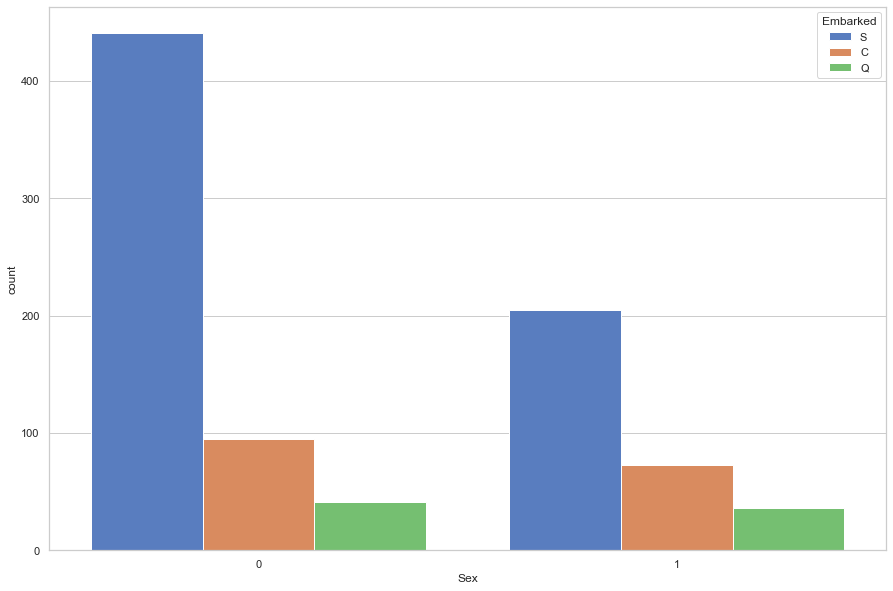

In [26]:
# visualizing whether embarked place affects the sex rate or not
sns.countplot('Sex', hue = 'Embarked', data = data)
plt.show()

C:\Users\ilona\Documents\sample_projects_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


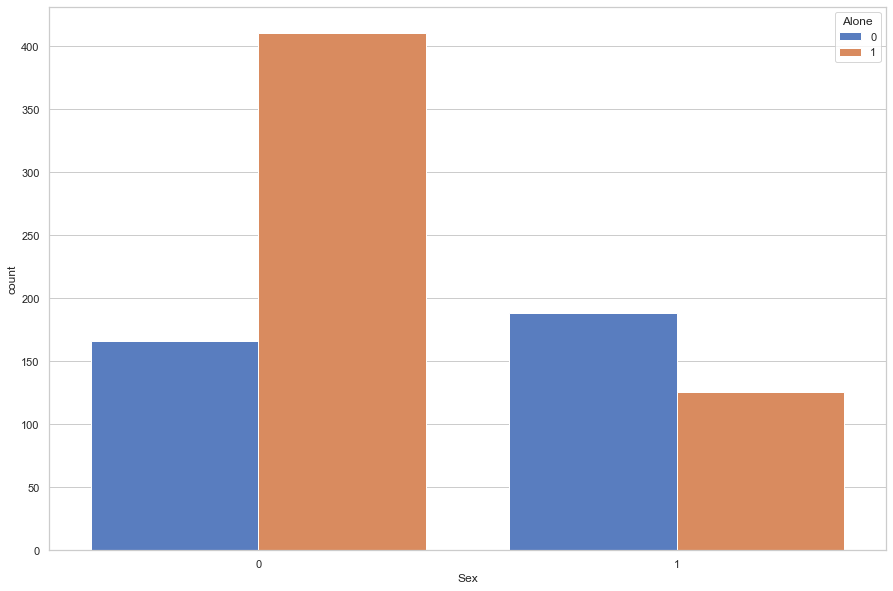

In [27]:
# visualizing whether sibsp affects the sex rate or not
sns.countplot('Sex', hue = 'Alone', data = data)
plt.show()

In [28]:
# inspect the correlation between Ticket and Sex rate
data[['Ticket', 'Sex']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Sex
0,1,0.397260
1,2,0.409836
2,3,0.312292
3,4,0.297619
4,C,0.340426
5,P,0.492308
6,S,0.215385


In [29]:
#grid = sns.FacetGrid(data, hue='Sex', height=6, aspect=1.5)
#grid.map(plt.hist, 'Fare', alpha=.5, bins=range(0,210,10))
#grid.add_legend()
#plt.show()

In [30]:
# inspect the correlation between Fare-bin and Sex rate
data[['Fare-bined', 'Sex']].groupby(['Fare-bined'], as_index=False).mean()

,Fare-bined,Sex
0,1,0.212291
1,2,0.195652
2,3,0.447674
3,4,0.388889
4,5,0.528409


In [31]:
data[['Age-bined', 'Sex']].groupby(['Age-bined'],as_index=False).mean()

,Age-bined,Sex
0,1,0.425000
1,2,0.517241
2,3,0.514286
3,4,0.319911
4,5,0.356846
5,6,0.303571
6,7,0.000000


RF Classifier 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2) 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.7877094972067039

In [33]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred)) # compare test and pred labels

print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       116
           1       0.73      0.63      0.68        63

    accuracy                           0.79       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.78      0.79      0.78       179

[[101  15]
 [ 23  40]]
0.7877094972067039


In [34]:
#i keep the default hyperparametres
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [35]:
# adjusting hyperparameters 

from sklearn.model_selection import RandomizedSearchCV

# Define a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # try 10 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

# Find the best hyperparameters
print(rs_clf.best_params_)

# Scoring automatically uses the best hyperparameters
rs_clf.score(X_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=5

0.8715083798882681

In [36]:
#X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2) 
clf_2 = RandomForestClassifier(n_estimators=1000)

In [37]:
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)

In [38]:
clf_2.score(X_test,y_test) #with hyperparametres tuned

0.8324022346368715

In [39]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test,y_pred)) # compare test and pred labels

print(confusion_matrix(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       122
           1       0.78      0.67      0.72        57

    accuracy                           0.83       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.83      0.83      0.83       179

[[111  11]
 [ 19  38]]
0.8324022346368715


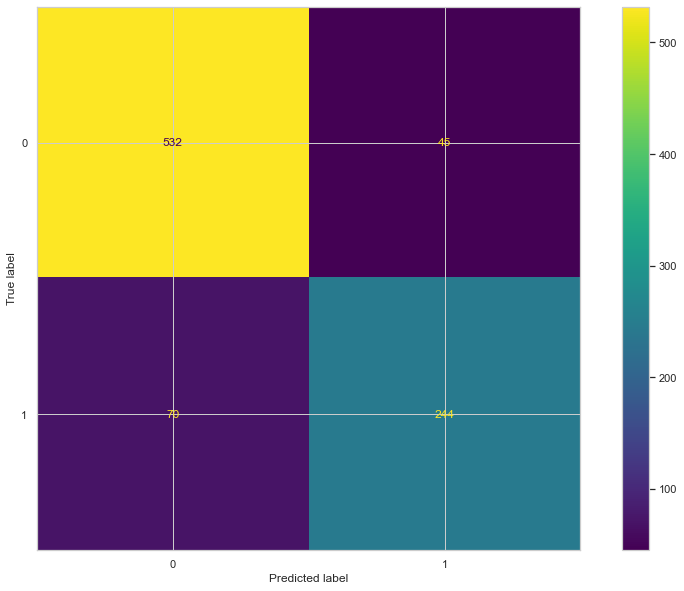

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf_2, X=X, y=y)

In [41]:
#save model and load it
import pickle 
pickle.dump(clf_2,open("RF_model_1.pkl","wb"))

In [42]:
loaded_clf_2=pickle.load(open("RF_model_1.pkl", "rb"))
loaded_clf_2.score(X_test,y_test)

0.8324022346368715

NN

In [43]:
# Neural Network
import keras 
from keras.models import Sequential 
from keras.layers import Dense

In [44]:
X=X.values

In [45]:
y=y.values

In [46]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [48]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [49]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(623, 27) (134, 27) (134, 27) (623,) (134,) (134,)


In [50]:
input_dim = X_train.shape[1]
X_train.shape[1]

27

In [69]:
from keras.layers import Dropout
from keras import regularizers

# layers
model= Sequential([
    Dense(9, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(input_dim,)),
    Dense(9, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(6, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
# summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 9)                 252       
                                                                 
 dense_12 (Dense)            (None, 9)                 90        
                                                                 
 dense_13 (Dense)            (None, 6)                 60        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 409
Trainable params: 409
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [71]:
batch_size = int(input_dim/100)
model_history=model.fit(X_train, y_train,
          batch_size=batch_size, epochs=200,
          validation_data=(X_val, y_val))

Epoch 1/200
20/20 [==============================] - 1s 7ms/step - loss: 1.0934 - accuracy: 0.3547 - val_loss: 1.0279 - val_accuracy: 0.3582
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 1.0163 - accuracy: 0.3772 - val_loss: 0.9737 - val_accuracy: 0.4403
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.9687 - accuracy: 0.4318 - val_loss: 0.9407 - val_accuracy: 0.5299
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.9361 - accuracy: 0.5490 - val_loss: 0.9145 - val_accuracy: 0.6343
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.9100 - accuracy: 0.6180 - val_loss: 0.8915 - val_accuracy: 0.6940
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8870 - accuracy: 0.6308 - val_loss: 0.8707 - val_accuracy: 0.6866
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.8666 - accuracy: 0.6372 - val_loss: 0.8522 - val_accuracy: 0.6866
Epoch 8/200
2

Epoch 59/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7961 - val_loss: 0.5085 - val_accuracy: 0.8060
Epoch 60/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7978 - val_loss: 0.5079 - val_accuracy: 0.8060
Epoch 61/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.7961 - val_loss: 0.5062 - val_accuracy: 0.8209
Epoch 62/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.7961 - val_loss: 0.5079 - val_accuracy: 0.8060
Epoch 63/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7978 - val_loss: 0.5058 - val_accuracy: 0.8209
Epoch 64/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7978 - val_loss: 0.5066 - val_accuracy: 0.7985
Epoch 65/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7913 - val_loss: 0.5052 - val_accuracy: 0.8209
Epoch 

20/20 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.8154 - val_loss: 0.4854 - val_accuracy: 0.8284
Epoch 174/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.8186 - val_loss: 0.4854 - val_accuracy: 0.8284
Epoch 175/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.8186 - val_loss: 0.4871 - val_accuracy: 0.8358
Epoch 176/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.8170 - val_loss: 0.4863 - val_accuracy: 0.8284
Epoch 177/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.8202 - val_loss: 0.4866 - val_accuracy: 0.8284
Epoch 178/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.8202 - val_loss: 0.4855 - val_accuracy: 0.8284
Epoch 179/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.8138 - val_loss: 0.4856 - val_accuracy: 0.8284
Epoch 180/200

In [72]:
model.evaluate(X_test, y_test)[1]

5/5 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.8209


0.8208954930305481

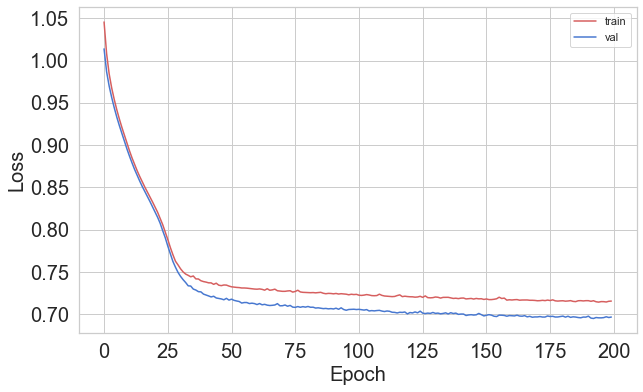

In [73]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

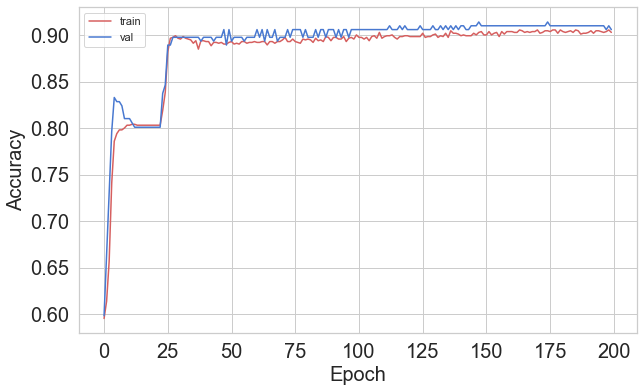

In [74]:
# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
#y_pred = model.predict(X_val)
#y_final = (y_pred > 0.5).astype(int).reshape(X_val.shape[0])

In [ ]:
#import pip
#pip.main(['install','tensorflow_hub'])